## Clustering

In [26]:
from utils import *
from gurobipy import Env

env = Env()
env.setParam('LogToConsole', 0)
env.start()
filename = "test6"
n = 200
K = 5
seed = 5
l = 3
alpha = 1/2
beta = [1,1,1]
lower = 2
upper = n
M = 1e6
np.random.seed(seed)
labels = np.random.choice([0,1,2], p= [0.1,0.2,0.7], size=n)

X,Y,archetype = synthetic_data(n,K,seed)
centers, dist, q, clusters, clusters_assign, t = initialize_clusters(X,K,l,alpha,beta,n,labels,M,lower,upper)

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


Optimizing Cluster Centers: 100%|██████████| 300/300 [00:00<00:00, 5346.04it/s, Status=SUCCESS]

Set parameter Username
Academic license - for non-commercial use only - expires 2025-02-08


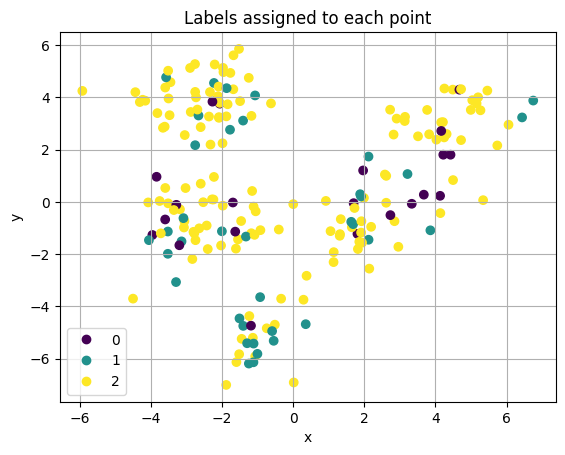

In [81]:
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Labels assigned to each point')
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

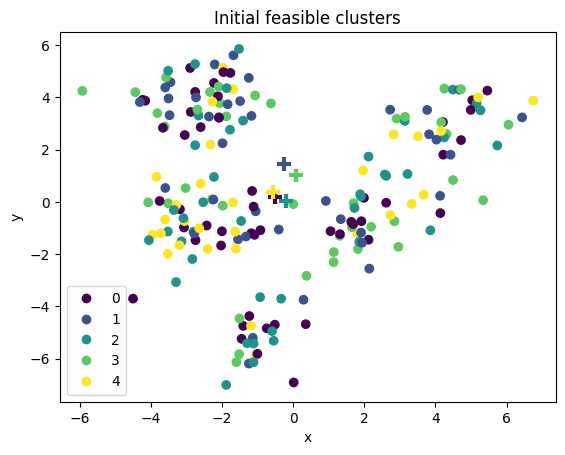

In [28]:
scatter = plt.scatter(X[:,0],X[:,1],c=clusters_assign,label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial feasible clusters')
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2,3,4])
plt.scatter([x[0] for x in centers],[x[1] for x in centers], marker="+", c=[0,1,2,3,4], s=100, linewidth=3)
plt.show()

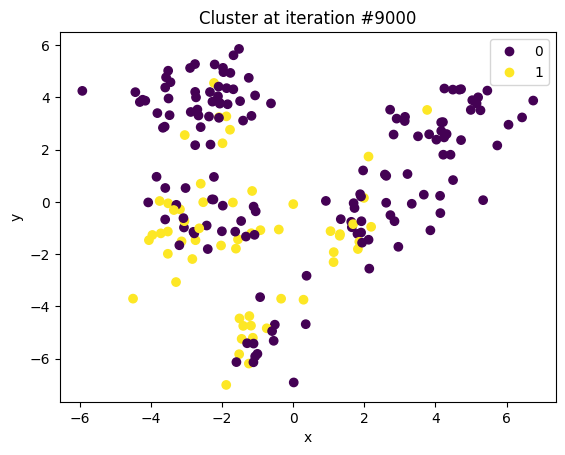

In [30]:
n = 9000
scatter = plt.scatter(X[:,0],X[:,1],c=s1[n],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

In [34]:
size_new_clusters = [sum(i) for i in s]

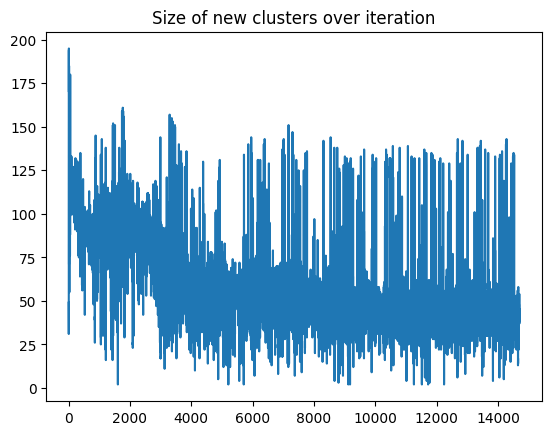

In [35]:
plt.plot(size_new_clusters)
plt.title("Size of new clusters over iteration")
plt.show()

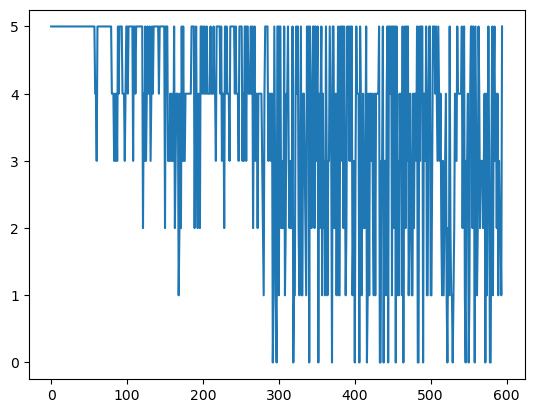

In [16]:
sizes_of_solutions = [sum(parsed_data[i]['master_solution']) for i in range(len(parsed_data))]
plt.plot(sizes_of_solutions)

In [17]:
sum(parsed_data[400]['master_solution'])

0

In [18]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []

    with open(file_path, 'r') as file:
        for line in file:
            # Check if the line contains 'Best objective'
            if 'Master Solution' in line:
                data.append(list(map(int, re.search(r'\[(.*?)\]', line).group(1).split(', '))))

    return data

# Example usage:
log_file_path = './outputs/out6_200_display.txt'
parsed_data2 = parse_log_file(log_file_path)

In [19]:
sum(parsed_data2[60])

4

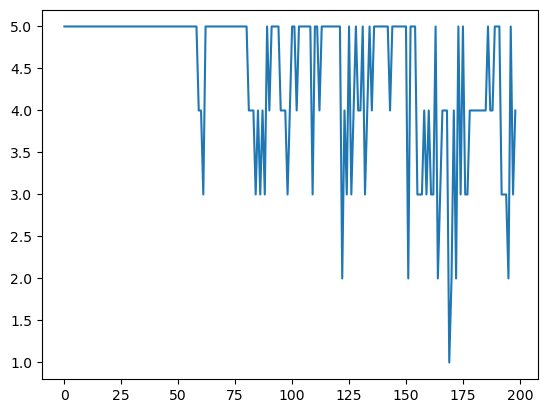

In [20]:
sizes = [sum(i) for i in parsed_data2]
plt.plot(sizes)

## Slack

In [14]:
import matplotlib.pyplot as plt
import ast
import numpy as np
import seaborn as sns

In [63]:
def parse_nested_list(line,name):
    try:
        line = line.strip()  # Remove leading/trailing whitespace
        if line.startswith(name):
            line = line[3:]  # Remove the prefix "r: "
        
        parsed_list = ast.literal_eval(line)
        if isinstance(parsed_list, list):
            return parsed_list
        else:
            raise ValueError("Input is not a valid nested list.")
    except ValueError as e:
        print("Error parsing nested list:", e)
        return None

In [64]:
import re
import datetime

# Function to parse the log file
def parse_log_file(file_path):
    data = []
    clusters = {}
    r = []
    s = []
    t = []

    with open(file_path, 'r') as file:
        for line in file:
            if 'Pricing New cluster' in line:
                pattern = re.compile(r'(\d+) Solution (\d+) Pricing New cluster \[([01, ]+)\]')
                # Match the pattern in the log line
                match = pattern.match(line)

                if match:
                    iteration = int(match.group(1))
                    solution_number = int(match.group(2))
                    cluster_values = list(map(int, match.group(3).split(', ')))
                    if iteration not in clusters:
                        clusters[iteration] = []
                    clusters[iteration].append(cluster_values)
                else:
                    print("No match found in the log line.")
            if 'Iteration #' in line:
                iteration_data = {'iteration': int(re.search(r'\d+', line).group())}
                # Read the next few lines and save the result
                for _ in range(7):  # Assuming 8 lines follow 'Best objective' based on the provided example
                    line = next(file)
                    # elif 'Pricing New cluster' in line:
                    #     iteration_data['new_cluster'] = list(map(int, re.search(r'\[(.*?)\]', line).group(0).replace('[', '').replace(']', '').split(', ')))
                    if 'Time' in line:
                        time_str = re.search(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}\.\d+', line).group()
                        iteration_data['time'] = datetime.datetime.strptime(time_str, "%Y-%m-%d %H:%M:%S.%f")
                    elif 'Slack variables' in line:
                        iteration_data['Slack variables'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Sum of Slack Variables' in line:
                        iteration_data['Sum of Slack Variables'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Objective' in line:
                        iteration_data['master_objective'] = float(re.search(r'-?\d+\.\d+', line).group())
                    elif 'Master Solution' in line:
                        iteration_data['master_solution'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 'Master Dual' in line:
                        iteration_data['master_dual'] = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                
                data.append(iteration_data)
            if 'Result' in line:
                for _ in range(10):
                    line = next(file)
                    if 'r: ' in line:
                        r = list(map(float, re.search(r'\[(.*?)\]', line).group(1).split(', ')))
                    elif 's: ' in line:
                        s = parse_nested_list(line, 's: ')
                    elif 't: ' in line:
                        t = parse_nested_list(line, 't: ')


    return data,clusters,r,s,t

In [65]:
parsed_data1,clusters1,r1,s1,t1 = parse_log_file('./outputs/out7_slack4.txt')
parsed_data2,clusters2,r2,s2,t2 = parse_log_file('./outputs/out7_slack5.txt')

In [123]:
len(parsed_data1[0]['Slack variables'])

200

In [143]:
fair_slacks1 = []
fair_slacks2 = []
fair_slacks3 = []
sum_fair_slacks = []
for i in parsed_data2:
    fair_slacks1.append(i['Slack variables'][-3])
    fair_slacks2.append(i['Slack variables'][-2])
    fair_slacks3.append(i['Slack variables'][-1])
    sum_fair_slacks.append(20 * sum(i['Slack variables'][-3:]))

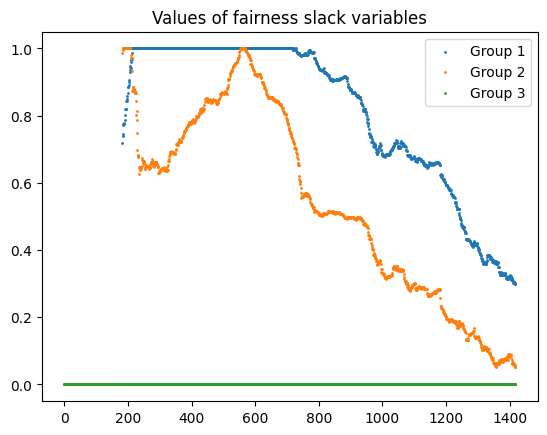

In [141]:
plt.scatter(range(len(fair_slacks1)),fair_slacks1,s = 1, label = "Group 1")
plt.scatter(range(len(fair_slacks1)),fair_slacks2,s = 1, label = "Group 2")
plt.scatter(range(len(fair_slacks1)),fair_slacks3,s = 1, label = "Group 3")
plt.title("Values of fairness slack variables")
plt.legend()
plt.show()

In [125]:
parsed_data2[0]['Slack variables'][-3:]

[0.0, 0.0, 0.0]

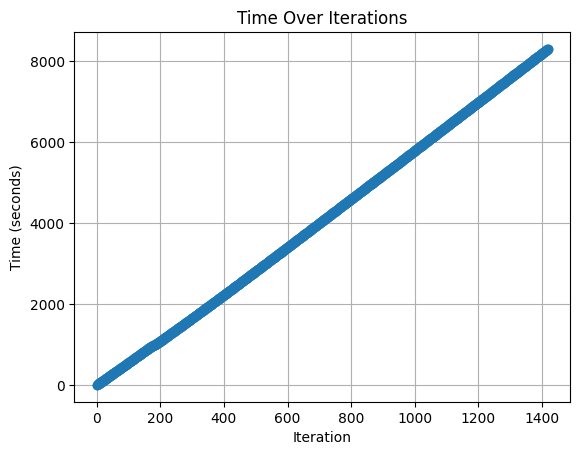

In [9]:
# iterations1 = [iteration['iteration'] for iteration in parsed_data1]
# times1 = [iteration['time'] for iteration in parsed_data1]


# time_seconds = [(time - times[0]).total_seconds() for time in times]

# plt.plot(iterations, time_seconds, marker='o')
# plt.xlabel('Iteration')
# plt.ylabel('Time (seconds)')
# plt.title('Time Over Iterations')
# plt.grid(True)
# plt.show()

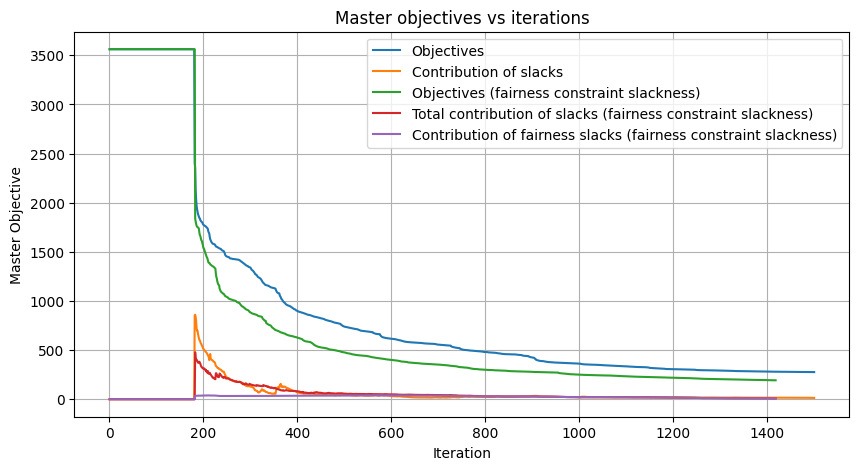

In [147]:
iterations1 = [iteration['iteration'] for iteration in parsed_data1]
objectives1 = [iteration['master_objective'] for iteration in parsed_data1]
slacks1 = [20 * iteration['Sum of Slack Variables'] for iteration in parsed_data1]

iterations2 = [iteration['iteration'] for iteration in parsed_data2]
objectives2 = [iteration['master_objective'] for iteration in parsed_data2]
slacks2 = [20 * iteration['Sum of Slack Variables'] for iteration in parsed_data2]

plt.figure(figsize=(10, 5)) 

plt.plot(iterations1, objectives1,label='Objectives')
plt.plot(iterations1, slacks1,label='Contribution of slacks')

plt.plot(iterations2, objectives2,label='Objectives (fairness constraint slackness)')
plt.plot(iterations2, slacks2,label='Total contribution of slacks (fairness constraint slackness)')
plt.plot(iterations2, sum_fair_slacks ,label='Contribution of fairness slacks (fairness constraint slackness)')

plt.xlabel('Iteration')
plt.ylabel('Master Objective')
plt.title('Master objectives vs iterations')
plt.grid(True)
plt.legend()
plt.show()

In [150]:
cluster_sizes1 = [sum(i) for i in s1]

In [155]:
len(cluster_sizes1)

14708

In [156]:
sol1 = (parsed_data1[-1]['master_solution'])

In [171]:
sol1[0]

0.0

In [174]:
aux = 0
for i,j in enumerate(sol1):
    aux += s1[i][0] * sol1[i]
print(aux)

0.28102718572581303


In [164]:
res1 = 0
for i,j in enumerate(sol1):
    res1 += cluster_sizes1[i] * j
print(res1)

78.90996747788766


In [168]:
parsed_data1[-1]['Slack variables']

[0.0,
 0.21840870456113512,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.028661055994559682,
 0.0,
 0.0021403059500145517,
 0.0,
 0.002450484982970881,
 0.0,
 0.005808055676583716,
 0.012852950702207683,
 0.0038574525926630514,
 0.0009855611028056557,
 0.0,
 0.0,
 0.012348729782616748,
 0.014541928805190878,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.09791117647990791,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02062155002055857,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.19665000676036642,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0018922050723915035,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.01254090034527472,
 0.0,
 0.0,
 0.0,
 0.0008325469743147296,
 0.0,
 0.0,
 0.0009497066970836354,
 0.0,
 0.0,
 0.0,
 0.0,
 0.010817870677508279,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.007160451138568419,
 0.0,
 0.0

In [162]:
200 - sum(parsed_data1[-1]['Slack variables'])

199.32557196130244

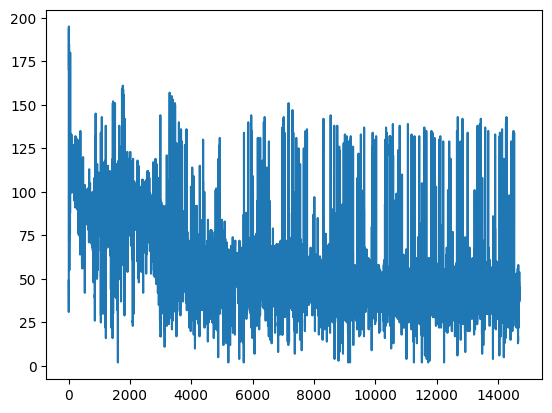

In [151]:
plt.plot(cluster_sizes1)

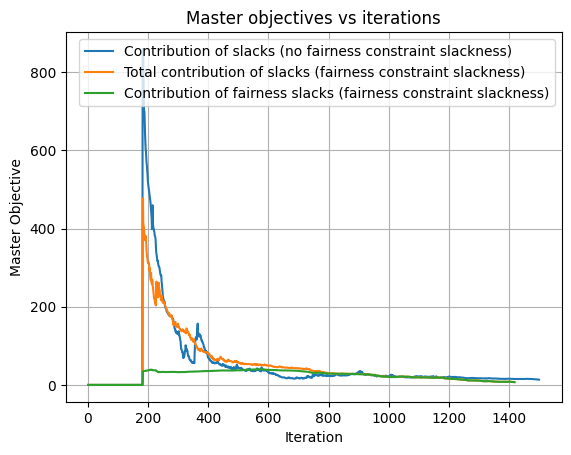

In [146]:
plt.plot(iterations1, slacks1,label='Contribution of slacks (no fairness constraint slackness)')
plt.plot(iterations2, slacks2,label='Total contribution of slacks (fairness constraint slackness)')
plt.plot(iterations2, sum_fair_slacks ,label='Contribution of fairness slacks (fairness constraint slackness)')

plt.xlabel('Iteration')
plt.ylabel('Master Objective')
plt.title('Master objectives vs iterations')
plt.grid(True)
plt.legend()
plt.show()

In [8]:
def solutions_analyze(parsed_data):
    sizes_of_solutions = []
    sum_sizes_of_solutions = []
    num_nonzero_values = []
    for i in range(len(parsed_data)):
        sol = parsed_data[i]['master_solution']
        counter = 0
        for j in sol:
            if j > 0:
                counter += 1
        num_nonzero_values.append(counter)
        sizes_of_solutions.append(sum(sol) / counter)
        sum_sizes_of_solutions.append(sum(sol))
    return sizes_of_solutions,sum_sizes_of_solutions,num_nonzero_values

In [9]:
sizes_of_solutions2, sum_sizes_of_solutions2,num_nonzero_values2 = solutions_analyze(parsed_data2)
sizes_of_solutions1, sum_sizes_of_solutions1,num_nonzero_values1 = solutions_analyze(parsed_data1)


# plt.plot(iterations, sizes_of_solutions, marker='o',label='Avg values of Z (for those that are non-zero)')
# plt.plot(iterations, sum_sizes_of_solutions, c = 'r',label='Sum of Z')
# plt.xlabel('Iteration')
# plt.grid(True)
# plt.legend()
# plt.show()

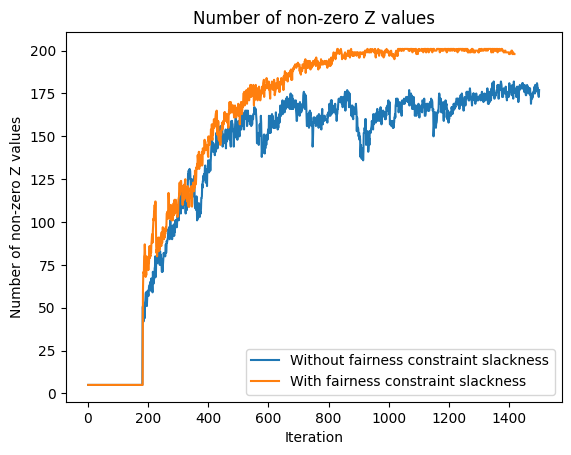

In [10]:
plt.plot(iterations1, num_nonzero_values1, label = "Without fairness constraint slackness")
plt.plot(iterations2, num_nonzero_values2, label = "With fairness constraint slackness")
plt.xlabel('Iteration')
plt.ylabel('Number of non-zero Z values')
plt.title('Number of non-zero Z values')
plt.legend()
plt.show()

## Heatmap of all solutions

In [11]:
all_master_solutions1 = [iteration['master_solution'] for iteration in parsed_data1]
all_master_solutions2 = [iteration['master_solution'] for iteration in parsed_data2]

In [12]:
def data_padding(all_master_solutions):
    data = all_master_solutions

    max_len = max(len(row) for row in data)

    # Pad the rows with zeros to make them of equal length
    padded_data = [row + [0.0] * (max_len - len(row)) for row in data]

    # Convert data to a numpy array for plotting
    heatmap_data = np.array(padded_data)

    heatmap_data_reduced = np.where(heatmap_data < 1e-3, 0, heatmap_data)

    chosen = []
    for i in range(heatmap_data_reduced.shape[1]):
        if sum(heatmap_data[:,i]) != 0:
            chosen.append(i)

    heatmap_data_chosen = heatmap_data[:,chosen]

    return heatmap_data,heatmap_data_reduced, chosen

In [13]:
heatmap_data1,heatmap_data_reduced1, chosen1 = data_padding(all_master_solutions1)

In [94]:
heatmap_data2,heatmap_data_reduced2, chosen2 = data_padding(all_master_solutions2)

In [95]:
cmap = sns.cm.rocket_r

In [98]:
heatmap_data1.shape

(1500, 14698)

In [99]:
heatmap_data2.shape

(1418, 13945)

In [100]:
print(len(chosen1)/heatmap_data1.shape[1])
print(len(chosen2)/heatmap_data2.shape[1])

0.448156211729487
0.394908569379706


In [97]:
print(len(chosen1))
print(len(chosen2))

6587
5507


In [96]:
# plt.figure(figsize=(16, 16),dpi = 5000)
fig = plt.figure(dpi = 1000)
sns.heatmap(heatmap_data2[:,chosen2],cmap = cmap,vmax = 0.1)
fig.savefig("heatmap2_reduced.png")
plt.close()

In [17]:
# plt.figure(figsize=(16, 16),dpi = 5000)
fig = plt.figure(dpi = 1000)
sns.heatmap(heatmap_data1[:,chosen1],cmap = cmap,vmax = 0.1)
fig.savefig("heatmap1_reduced.png")
plt.close()

In [20]:
# indices_reduced = list(range(len(heatmap_data1[-1,chosen1])))
# indices_reduced_sorted = sorted(indices_reduced,key= lambda i : -heatmap_data1[-1,chosen1][i])
# print(indices_reduced_sorted)
# print(np.array(heatmap_data[-1,chosen])[indices_reduced_sorted])

In [109]:
def top20(all_master_solutions,t,r,s):
    indices = list(range(len(all_master_solutions[-1])))
    indices_sorted = sorted(indices,key= lambda i : -all_master_solutions[-1][i])
    solutions_sorted = np.array(all_master_solutions[-1])[indices_sorted]
    t = np.array(t)
    alpha_rep = [str(i) for i in t[:,indices_sorted].T]
    df = pd.DataFrame({"Cluster Number": indices_sorted, 
                       "Solution": solutions_sorted, 
                       "Cluster cost": np.array(r)[indices_sorted], 
                       "Size of cluster": np.sum(np.array(s)[indices_sorted],axis = 1), 
                       "Fairness representation": alpha_rep})
    return df

In [110]:
df1 = top20(all_master_solutions1,t1,r1,s1)
df1

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness representation
0,5209,0.382118,31.367183,2,[1 1 0]
1,3518,0.270239,127.448346,19,[0 0 1]
2,4877,0.264289,0.722703,5,[0 0 1]
3,5711,0.229344,8.663223,2,[0 0 1]
4,6833,0.223681,40.469662,8,[1 1 0]
...,...,...,...,...,...
14693,14692,0.000000,274.732359,38,[0 0 1]
14694,14693,0.000000,281.506140,40,[0 0 1]
14695,14694,0.000000,281.887907,41,[0 0 1]
14696,14696,0.000000,318.006237,44,[0 0 1]


In [112]:
df2 = top20(all_master_solutions2,t2,r2,s2)

In [113]:
df2[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness representation
0,2250,0.499988,51.795331,2,[0 1 1]
1,9467,0.193773,11.790059,11,[0 0 1]
2,3318,0.179113,123.327080,10,[0 0 1]
3,11885,0.178625,4.479737,4,[1 1 0]
4,12708,0.163679,2.238617,2,[1 1 0]
5,11659,0.149513,19.516726,18,[0 1 1]
6,12052,0.139625,3.737778,4,[1 0 1]
7,4319,0.135360,38.849157,7,[0 0 1]
8,12115,0.135353,30.323894,12,[0 0 1]
9,9563,0.107337,5.296568,5,[0 0 1]


In [19]:
indices1 = list(range(len(all_master_solutions1[-1])))
indices_sorted1 = sorted(indices1,key= lambda i : -all_master_solutions1[-1][i])

In [22]:
print(indices_sorted1)

[5209, 3518, 4877, 5711, 6833, 10860, 3130, 7165, 11582, 8802, 8948, 4686, 7376, 5256, 7191, 8033, 8554, 8834, 12937, 8673, 5358, 11287, 10270, 9115, 7837, 8922, 12238, 12244, 12497, 11091, 11262, 3981, 9883, 10260, 9177, 9037, 7840, 6061, 11358, 10314, 9743, 5253, 11773, 11617, 7697, 14254, 13015, 10519, 10593, 13027, 7598, 11289, 10105, 10406, 11737, 13245, 12085, 12684, 12723, 7829, 6634, 13488, 12108, 13375, 12847, 8805, 14048, 5267, 11999, 11285, 11520, 13038, 13670, 12855, 12788, 11190, 10266, 12736, 10130, 14413, 11009, 10718, 13068, 12220, 14601, 5562, 14365, 12093, 12143, 14352, 11678, 9685, 9593, 12757, 14190, 14183, 9729, 12297, 13329, 14622, 14488, 14203, 14655, 14447, 14432, 14339, 14483, 14230, 13330, 14277, 13507, 10269, 14477, 11610, 9592, 14656, 14669, 13628, 12467, 3515, 13544, 14520, 14326, 14216, 14490, 13545, 11579, 14417, 6215, 13673, 14387, 14516, 14466, 14184, 10673, 13837, 14086, 14687, 14364, 14367, 14479, 14366, 14350, 14457, 6119, 14504, 3202, 13674, 14695, 

In [48]:
solutions_sorted1 = np.array(all_master_solutions1[-1])[indices_sorted1]

In [46]:
import pandas as pd

In [60]:
np.sum(np.array(s1)[indices_sorted1],axis = 1)

array([ 2, 19,  5, ..., 41, 44, 46])

In [77]:
t1 = np.array(t1)
alpha_rep1 = [str(i) for i in t1[:,indices_sorted1].T]

In [78]:
df = pd.DataFrame({"Cluster Number": indices_sorted1, "Solution": solutions_sorted1, "Cluster cost": np.array(r1)[indices_sorted1], "Size of cluster": np.sum(np.array(s1)[indices_sorted1],axis = 1), "Fairness representation": alpha_rep1})

In [117]:
df[:20]

,Cluster Number,Solution,Cluster cost,Size of cluster,Fairness representation
0,5209,0.382118,31.367183,2,[1 1 0]
1,3518,0.270239,127.448346,19,[0 0 1]
2,4877,0.264289,0.722703,5,[0 0 1]
3,5711,0.229344,8.663223,2,[0 0 1]
4,6833,0.223681,40.469662,8,[1 1 0]
5,10860,0.160124,51.213790,18,[1 0 0]
6,3130,0.159928,5.042458,11,[0 1 0]
7,7165,0.149197,31.799429,12,[1 0 1]
8,11582,0.141348,39.196025,22,[0 0 1]
9,8802,0.140222,0.808651,3,[0 1 0]


In [116]:
r2[5209]

662.120553013261

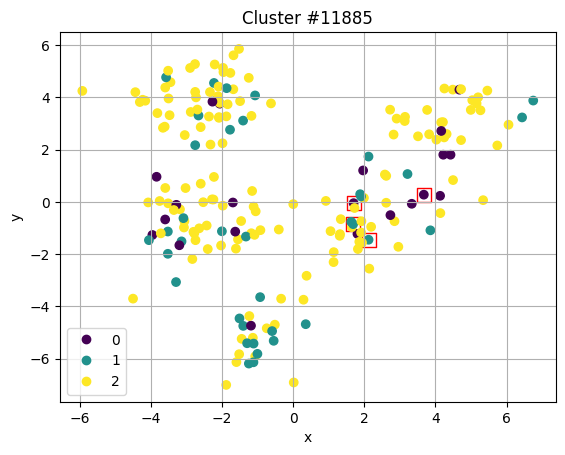

In [121]:
n = 11885
cluster_x = []
cluster_y = []
for i,j in enumerate(s2[n]):
    if j == 1:
        cluster_x.append(X[:,0][i])
        cluster_y.append(X[:,1][i])
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Cluster at iteration #'+str(n))
#plt.grid(True)
#plt.show()
scatter = plt.scatter(X[:,0],X[:,1],c=labels,label="Groups")
plt.scatter(cluster_x,cluster_y,marker="s",edgecolors="r",facecolors='none',s=100)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster #' + str(n))
plt.grid(True)
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1,2])
plt.show()

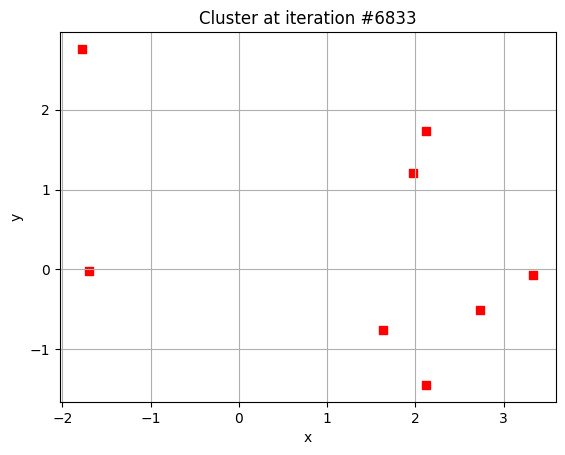

In [88]:
n = 6833
cluster_x = []
cluster_y = []
for i,j in enumerate(s1[n]):
    if j == 1:
        cluster_x.append(X[:,0][i])
        cluster_y.append(X[:,1][i])
scatter = plt.scatter(cluster_x,cluster_y,marker="s",c="r")
#plt.xlabel('x')
#plt.ylabel('y')
#plt.title('Cluster at iteration #'+str(n))
#plt.grid(True)
#plt.show()

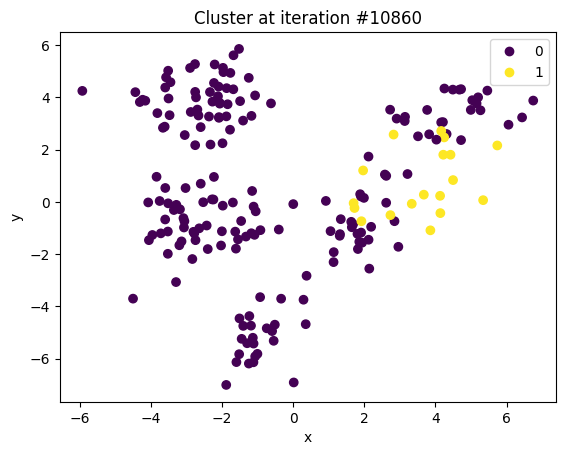

In [37]:
n = 10860
scatter = plt.scatter(X[:,0],X[:,1],c=s1[n],label="Groups")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Cluster at iteration #'+str(n))
plt.legend(handles=scatter.legend_elements()[0], labels=[0,1])
plt.show()

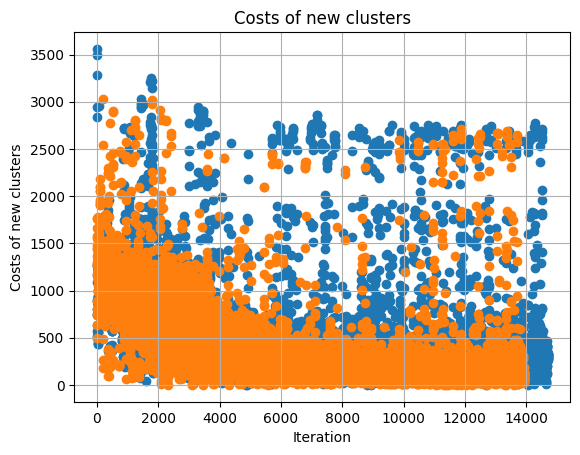

In [45]:
plt.scatter(range(len(r1)),r1)
plt.scatter(range(len(r2)),r2)
plt.xlabel('Iteration')
plt.ylabel('Costs of new clusters')
plt.title('Costs of new clusters')
plt.grid(True)
plt.show()

In [41]:
plt.plot(size_new_clusters)
plt.xlabel('Iteration')
plt.ylabel('Number of points in new clusters')
plt.title('Number of points in new clusters')
plt.grid(True)
plt.show()

NameError: name 'size_new_clusters' is not defined

In [167]:
objective_no_slacks = []
for d in (parsed_data1[300:301]):
  sol = d['master_solution']
  total_obj = d['master_objective']
  slacks = 20 * sum(d['Slack variables'])
  res = 0
  print(len(sol))
  print(len(r1))
  #print(np.array(r) @ np.array(sol))
  for i,j in enumerate(sol):
    #print("r[i],j",r[i],j,r[i]*j)
    if j != 0:
      res += r1[i] * j
  print(res)
  print(total_obj, res + slacks)
  objective_no_slacks.append(res)
#plt.plot(objective_no_slacks)

2992
14708
1207.4422244495036
1336.6651039498554 1336.665103949855
